# PCA - Hazel's Extras

## Example (2d -> 1d)


[[22.57836896 26.97688859 27.11210429 30.13602561 26.9857098  27.77917175
  24.65246913 20.39846156 25.70365733 20.67271808 20.0332513  20.24943037
  22.33348751 28.61036942 22.18494413 24.14160291 27.33510428 30.13464603
  22.66504196 22.95639345 27.6918822  21.61974961 17.77924888 33.68411688
  31.13681097 23.47614109 26.72105232 16.53153204 18.38890954 32.68009317
  30.59297941 25.02854342 17.71858522 26.86125398 15.77689137 35.02975523
  18.94933563 20.27418195 29.24543814 17.71741573 26.51298683 19.26723932
  22.70577214 22.49337204 27.39870369 21.24988963 24.78062113 21.17574771
  27.06371582 36.73048033 29.16591448 17.3868938  37.53399317 26.32216095
  18.86958648 19.9573756  21.43284364 27.31394653 26.57694323 30.18973202
  20.07778833 24.37899111 17.54470934 21.83280319 26.21163563 24.2118548
  17.4431023  27.07872969 19.51602121 27.17936377 21.5373002  23.17620137
  24.20762569 28.30136368 26.47014647 25.60863101 28.40773524 25.22988479
  22.56707663 23.7872445  25.79715765 2

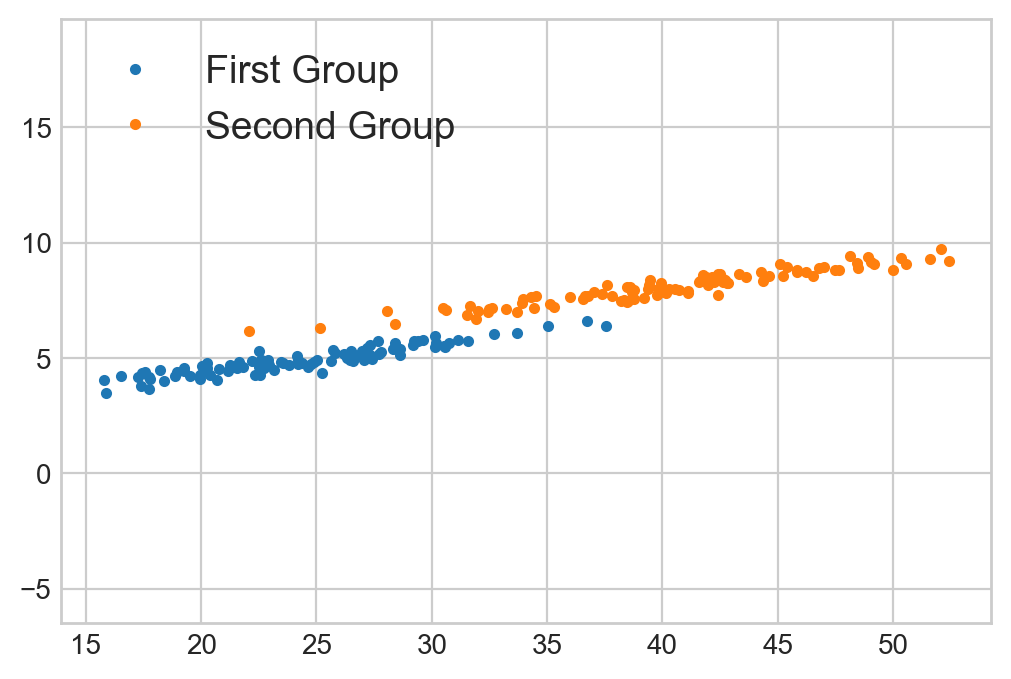

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy
plt.rcParams['figure.dpi'] = 200 # make plots bigger
'''
We are going to create an artificial dataset with 200 data points in 2D space (2 features). 

'''
mean = [0, 0]
cov = [[1.25, 0.75], [0.75, 0.5]]
n = 200

x1 = np.random.multivariate_normal(mean, cov, n//2).T + np.array([5, 5]).reshape(2, 1)
x1 = x1 * np.array([5, 1]).reshape(2, 1)
print(x1)
x2 = np.random.multivariate_normal(mean, cov, n-n//2).T + np.array([8, 8]).reshape(2, 1)
x2 = x2 * np.array([5, 1]).reshape(2, 1)

orig_x = np.concatenate((x1.T, x2.T)).T

print(orig_x.shape)


with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(x1[0], x1[1], '.', label='First Group')
    plt.plot(x2[0], x2[1], '.', label='Second Group')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()

In [2]:
print(orig_x.T)

[[27.95351037  5.48040233]
 [33.64110032  6.29052136]
 [31.16903501  5.74733805]
 [26.03481517  5.3191624 ]
 [26.63910009  5.11012083]
 [26.48162125  5.5095289 ]
 [35.79192899  6.55804975]
 [22.0297985   4.75673656]
 [20.20735547  4.51890963]
 [23.83994655  4.64162051]
 [31.87419849  5.83158322]
 [34.90480608  5.57503693]
 [14.07589077  3.57384364]
 [24.64102441  5.01062009]
 [16.49696745  3.77741947]
 [26.29383894  5.18632431]
 [28.0153325   5.05444548]
 [18.94260874  4.18020942]
 [29.29390443  5.5304145 ]
 [26.86048675  5.48574859]
 [30.73564705  5.7324564 ]
 [28.54827034  5.06530241]
 [17.19287824  4.13207586]
 [22.37973694  4.34341268]
 [12.64618529  4.00532243]
 [31.9487798   5.90657224]
 [33.35896488  5.93815807]
 [24.99723819  5.4582061 ]
 [23.05315867  4.7815827 ]
 [24.15635255  5.07880161]
 [20.10390477  4.56360933]
 [33.52175856  5.93799198]
 [28.52990524  5.60637882]
 [25.71587251  5.29968942]
 [20.20487608  4.63165648]
 [27.70704463  4.90577933]
 [24.13747173  4.94919702]
 

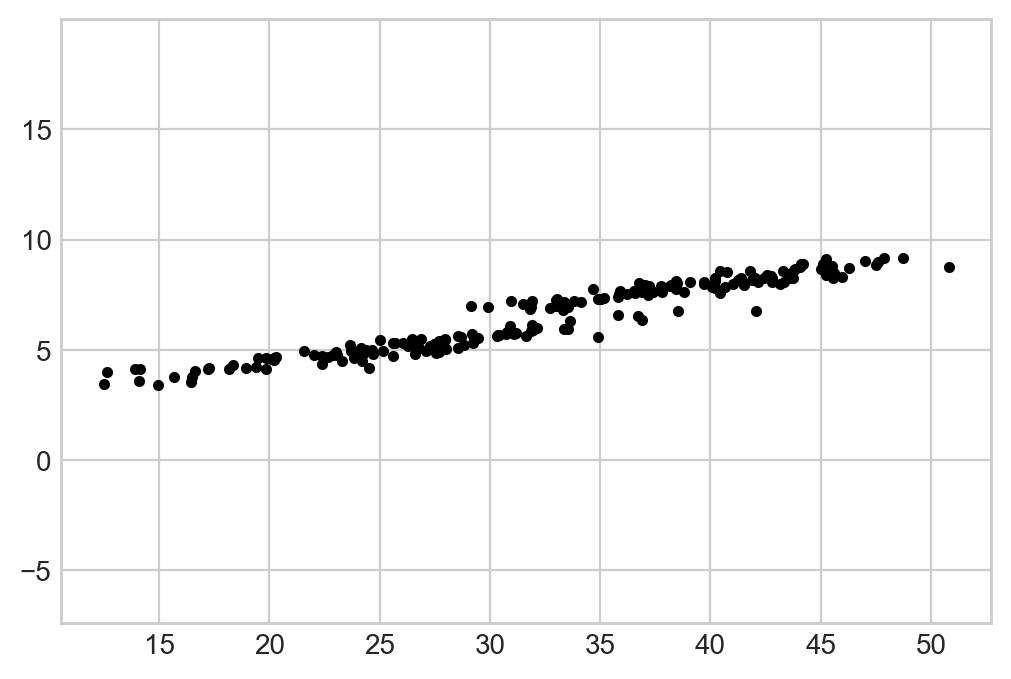

In [3]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(orig_x[0], orig_x[1], '.', color='k')
    plt.show()

In [4]:
'''
When using PCA we need to standardized the data by transforming it to having mean = 0. 
This is important because in PCA we will be looking at how different features contribute 
to the spread of the data. Therefore, different features must be comparable in terms of scale. Here we show 
how to standardize the data. Then, we visualize the artificial dataset we created. 
'''
# from sklearn.preprocessing import scale
# scaled_train_features = scale(orig_x.T).T
# print(scaled_train_features)

mean_x = np.mean(orig_x, axis = 1).reshape(2, 1)
# print(mean_x)
c_x = orig_x - mean_x
# print(c_x)
print('Mean: ', mean_x.T)

'''
This fixes 'scaling' problems.
'''
std_x = np.std(c_x, axis = 1).reshape(2, 1)
print('Std. Dev.: ', std_x.T)
x = c_x/std_x
# print(x)

Mean:  [[32.60183464  6.51721404]]
Std. Dev.:  [[8.90377248 1.60023468]]


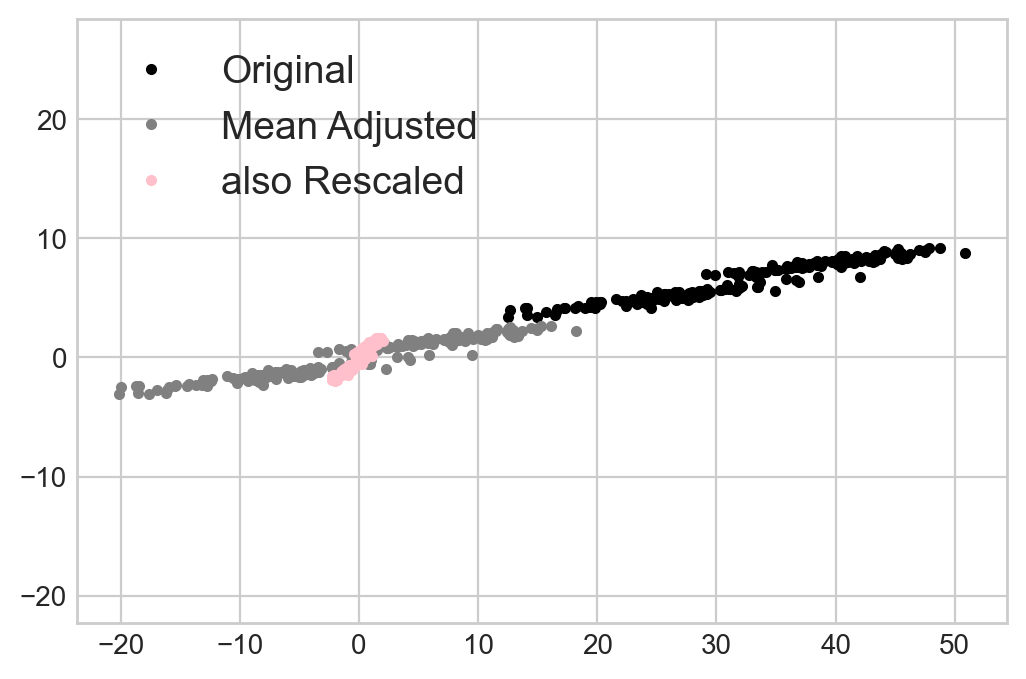

In [5]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(orig_x[0], orig_x[1], '.', color='k', label='Original')
    plt.plot(c_x[0], c_x[1], '.', color='gray', label='Mean Adjusted')
    plt.plot(x[0], x[1], '.', color='pink', label='also Rescaled')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()

The principal components of a dataset is given by the eigenvectors of the
covariance matrix of the dataset (see the tutorial link for details). 


In [6]:
cov_x = np.cov(x)
print('covariance matrix:')
print(cov_x)
w, v = np.linalg.eig(cov_x)
print('eigenvalues: ')
print(w)
print('eigenvectors: ')
print(v)

covariance matrix:
[[1.00502513 0.96592186]
 [0.96592186 1.00502513]]
eigenvalues: 
[1.97094698 0.03910327]
eigenvectors: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Note that the covariance matrix is symmetric positive-definite.

While the eigenvectors give us the direction of the principal components of the data, 
the eigenvalues give us the magnitude of each component. In the plot below each arrow
points in the direction of the two principal components of the data. The length of each arrow
is given by two times the square root of the eigenvalue associated with the eigenvector. The arrows 
delimite an ellipse that contains all points withing one standard deviation from the mean.


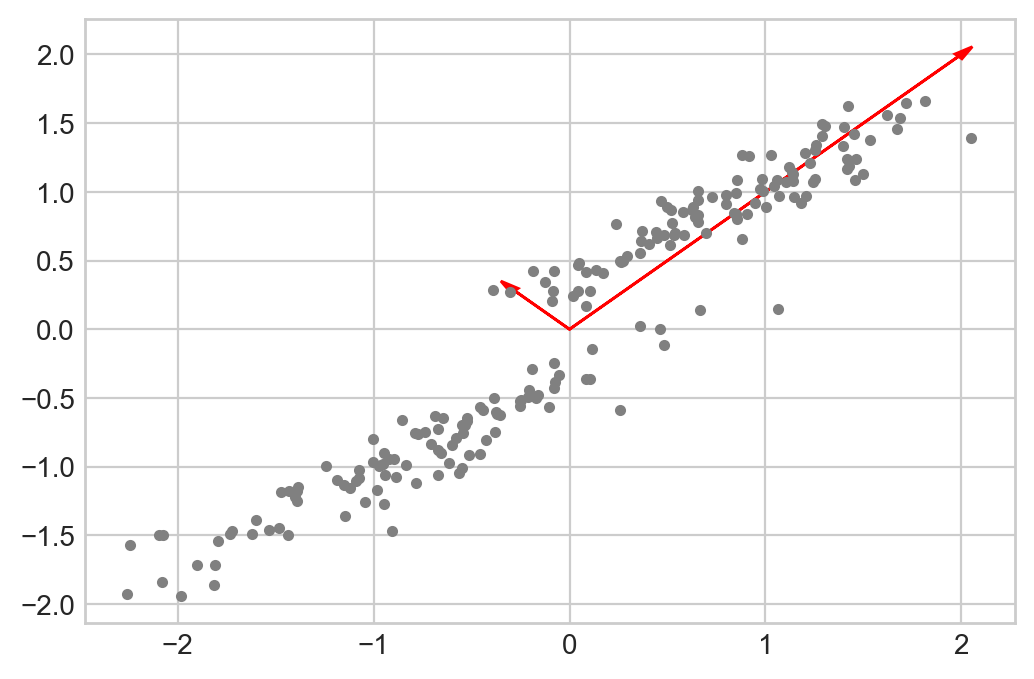

In [7]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.arrow(0, 0, v[0][0] * 2 * np.sqrt(w[0]), v[1][0] * 2 * np.sqrt(w[0]), head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.arrow(0, 0, v[0][1] * 2 * np.sqrt(w[1]), v[1][1] * 2 * np.sqrt(w[1]), head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.plot(x[0], x[1], '.', color='gray')
    plt.show()

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


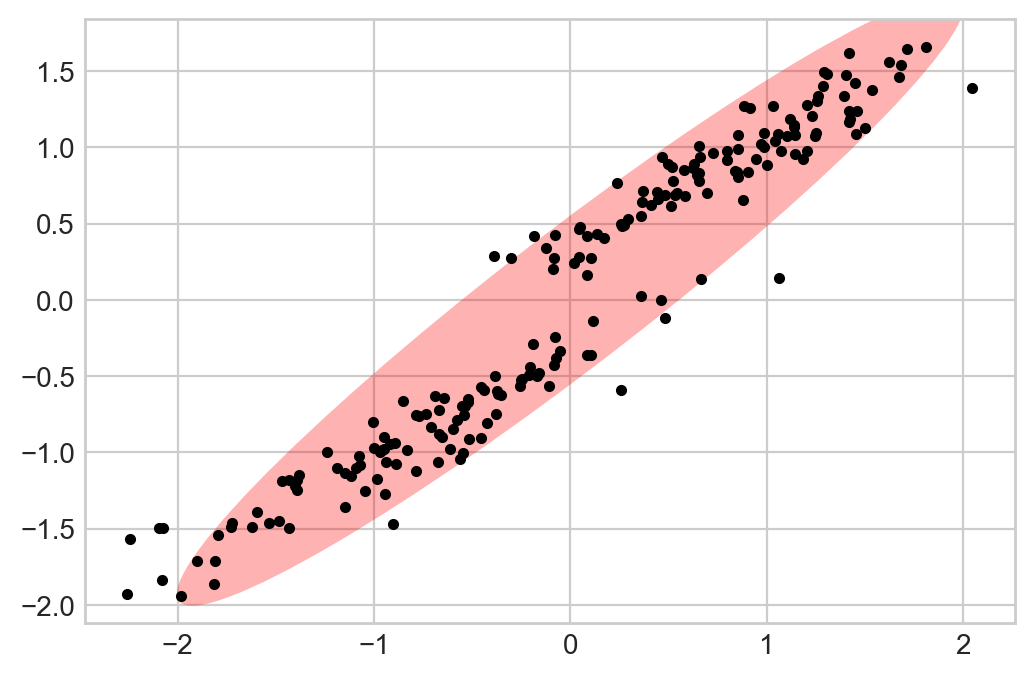

In [8]:
from matplotlib.patches import Ellipse

ellipse = Ellipse(
    (0, 0),
    2 * 2 * np.sqrt(w[0]),
    2 * 2 * np.sqrt(w[1]),
    -180*np.arctan(v[0][1]/v[0][0])/np.pi
)

print(v)

with plt.style.context('seaborn-whitegrid'):
    ellipse.set_alpha(0.3)
    ellipse.set_facecolor([1.0, 0.0, 0.0])
    ax = plt.axes()
    plt.plot(x[0], x[1], '.', color='k')
    ax.add_artist(ellipse)
    plt.show()
# Everything inside the pink is within 1σ (1 std dev)


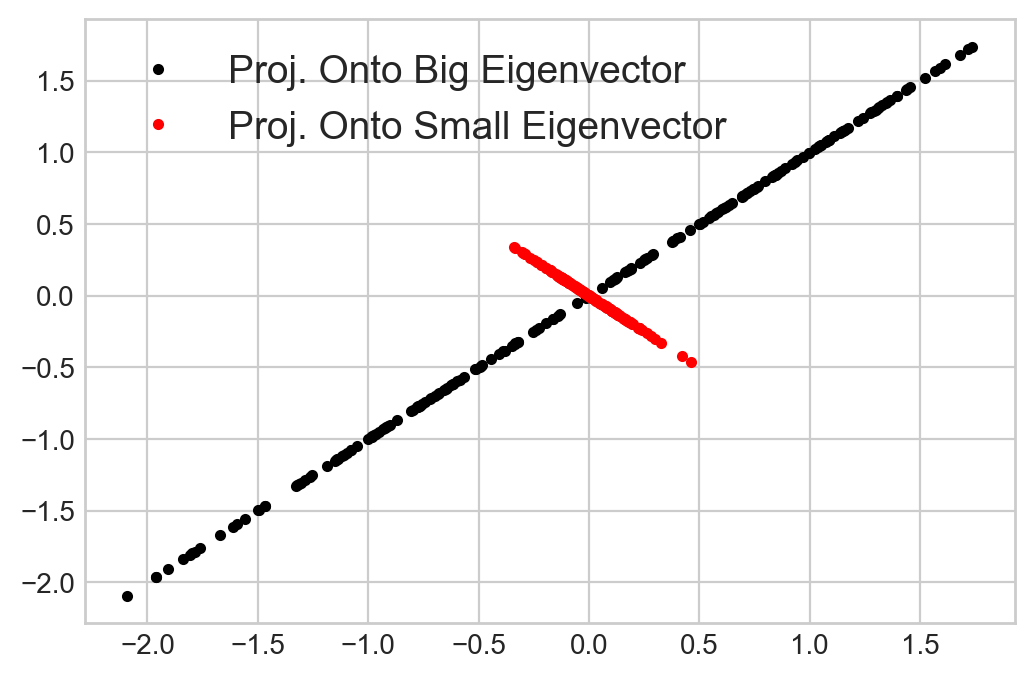

In [9]:
# basic vector projection. 
# we don't need to divide since they're already unit vectors
xt1v = x.T.dot(v[:,0]).reshape(n, 1).dot( v[:,0].reshape(1, 2))
xt2v = x.T.dot(v[:,1]).reshape(n, 1).dot( v[:,1].reshape(1, 2))

with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt1v[:, 0], xt1v[:, 1], '.', label='Proj. Onto Big Eigenvector', color='k')
    plt.plot(xt2v[:, 0], xt2v[:, 1], '.', label='Proj. Onto Small Eigenvector', color='r')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()


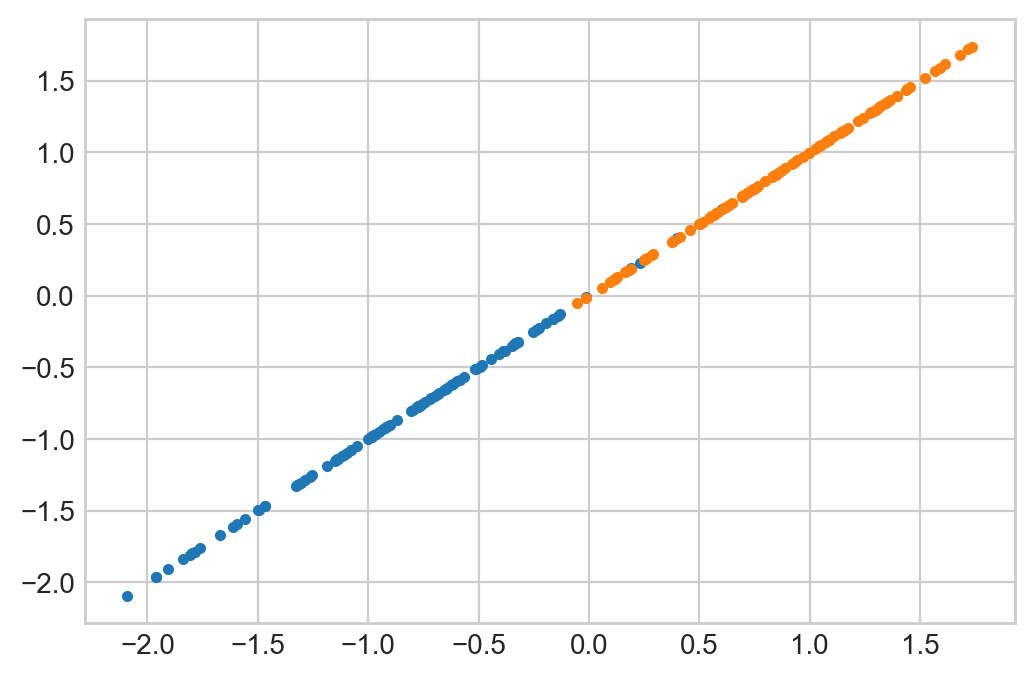

In [10]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt1v[:n//2, 0], xt1v[:n//2, 1], '.')
    plt.plot(xt1v[n//2:, 0], xt1v[n//2:, 1], '.')
    plt.show()


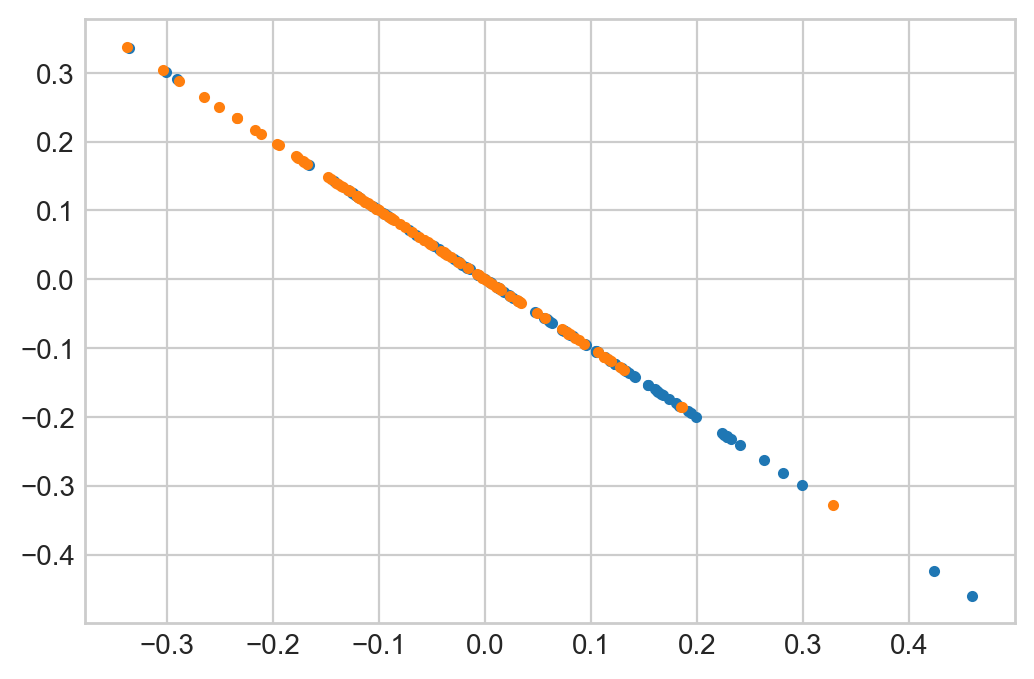

In [11]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt2v[:n//2, 0], xt2v[:n//2, 1], '.')
    plt.plot(xt2v[n//2:, 0], xt2v[n//2:, 1], '.')
    plt.show()


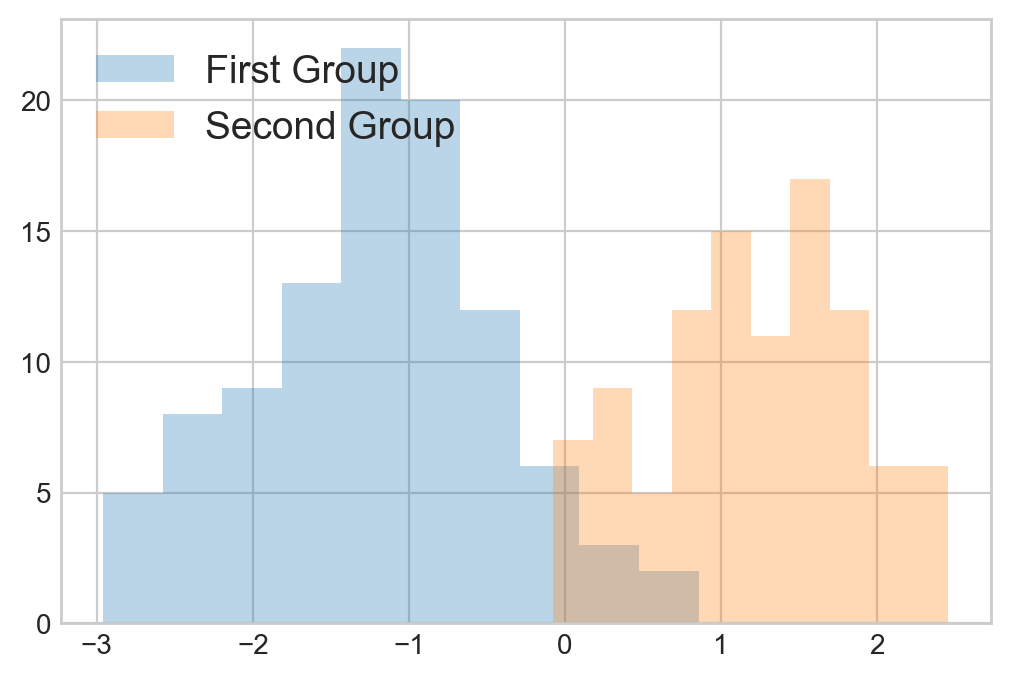

In [12]:
transform_1_x = x.T.dot(v[:,0])
transform_2_x = x.T.dot(v[:,1])

with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_1_x[:n//2], alpha=0.3, label="First Group")
    plt.hist(transform_1_x[n//2:], alpha=0.3, label="Second Group")
    plt.legend(loc='upper left', fontsize=14)

    plt.show()

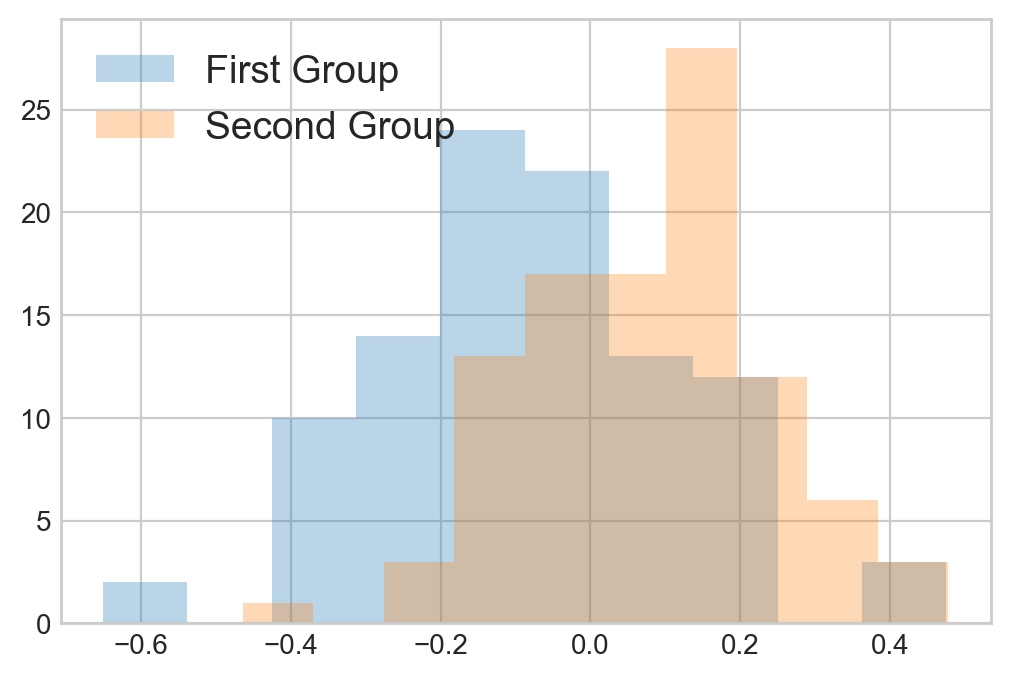

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_2_x[:n//2], alpha=0.3, label="First Group")
    plt.hist(transform_2_x[n//2:], alpha=0.3, label="Second Group")
    plt.legend(loc='upper left', fontsize=14)

    plt.show()

Most of the spread in the data above in explained by the eigenvector associated with the largest
eigenvalue (longest arrow above shows the component).

We can now project the original data onto a space defined by the first or the second eigenvectors. 
If we were dealing with a d-dimensional space, we could choose the k < d eigenvectors associated with 
the k largest eigenvalues and make them the column vectors of a projection matrix M. The transformed 
data would then be given by

```
x_transform = x.T.dot(M)
```

In our artificial example we will simply multiply of data x by each eigenvector and then 
visualize the transformed data onto this 1-dimensional space represented by a histogram. 

The histogram  shows that the space given by the dominant eigenvector has the largest spread in the data. 
If we were to choose between the two 1-dimensional spaces, we would choose the space given by the dominant 
eigenvector because it better preserves the variance of the data.


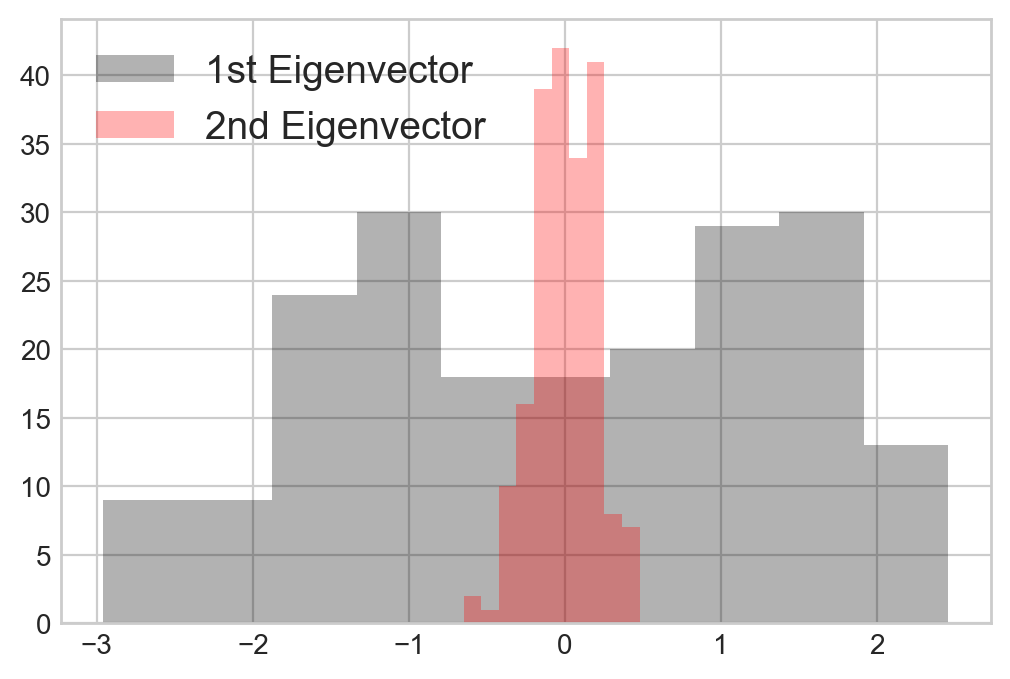

In [14]:
transform_1_x = x.T.dot(v[:,0])
transform_2_x = x.T.dot(v[:,1])

with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_1_x, alpha=0.3, label="1st Eigenvector", color='k')
    plt.hist(transform_2_x, alpha=0.3, label="2nd Eigenvector", color='r')
    plt.legend(loc='upper left', fontsize=14)

    plt.show()

## Other helpful hints

### Install pandas

1. activate your virtual environment: `source env/bin/activate`
2. `pip install pandas`
3. start juptyter like normal: `jupyter notebook `...
